In [1]:
import os
import re
import random as rd
import json

from doctr.models import ocr_predictor
from doctr.io import DocumentFile

screenshots_dir = "screenshots/landing_area/"

# Lists all files inside the directory
files = [screenshots_dir + f for f in os.listdir(screenshots_dir)]

model = ocr_predictor(
    det_arch="db_mobilenet_v3_large", reco_arch="crnn_mobilenet_v3_large", pretrained=True
)

/home/kriggs/miniconda3/envs/appwash_ocr/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


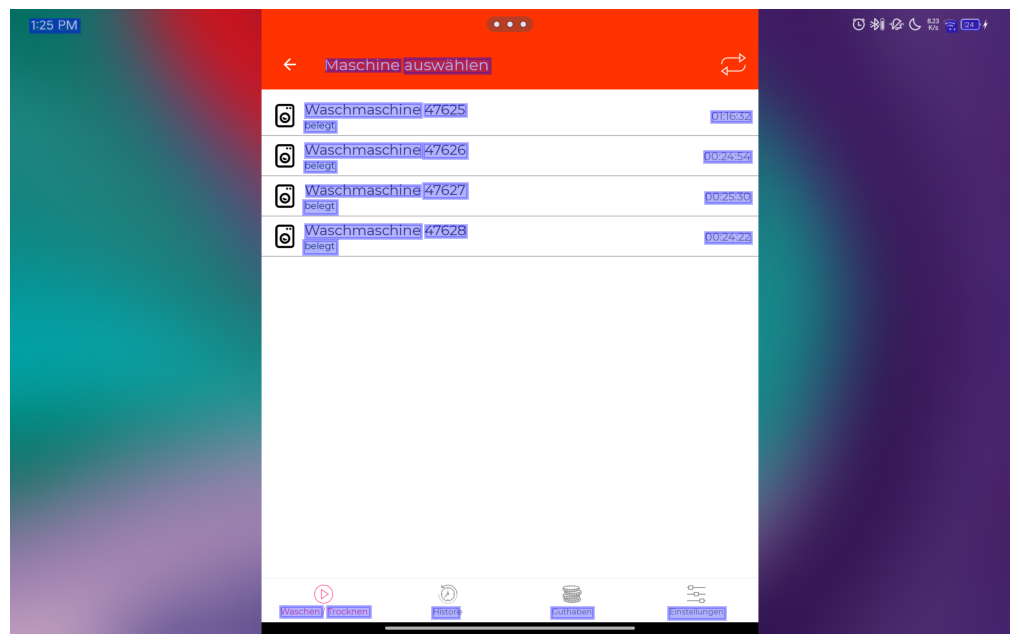

[
  {
    "type": "Waschmaschine",
    "status": "belegt",
    "number": "47625",
    "time": "01:16:32"
  },
  {
    "type": "Waschmaschine",
    "status": "belegt",
    "number": "47626",
    "time": "00:24:54"
  },
  {
    "type": "Waschmaschine",
    "status": "belegt",
    "number": "47627",
    "time": "00:25:30"
  },
  {
    "type": "Waschmaschine",
    "status": "belegt",
    "number": "47628",
    "time": "00:24:22"
  }
]
Waschmaschine 4


In [2]:
result = model(DocumentFile.from_images(files[0]))
result.show()

appliances = []

appliances_types = []
appliances_numbers = []
appliances_status = []
appliances_times = []

list_appliances_types = ["Waschmaschine", "Trockner"]
regex_applances_numbers = r"\b\d{5}\b"
list_appliances_in_use = ["belegt", "frei", "Laufzeit:"]
regex_applances_times = r".*\d{1}:\d{2}:\d{2}"

for page in result.pages:
    for block in page.blocks:
        for line in block.lines:
            for word in line.words:
                if word.value in list_appliances_types:
                    appliances_types.append(word.value)
                if word.value in list_appliances_in_use:
                    appliances_status.append(word.value)
                if re.search(regex_applances_numbers, word.value):
                    appliances_numbers.append(word.value)
                if re.search(regex_applances_times, word.value):
                    appliances_times.append(word.value)

for i in range(len(appliances_types)):
    appliances.append(
        {
            "type": appliances_types[i],
            "status": appliances_status[i],
            "number": appliances_numbers[i],
        }
    )

for i in appliances:
    if i.get("status") in ["belegt", "Laufzeit:"]:
        i["time"] = appliances_times.pop(0)

print(json.dumps(appliances, indent=2))

print(appliances[0]["type"], len(appliances))